# Transmisión de señales
En una red de computadoras, los nodos que la integran intercambian mensajes binarios directamente mediante su capa física. La capa física se encarga de convertir los bits de las tramas de la capa de enlace en ondas electromagnéticas que son enviadas y recibidas a través de un medio de transmisión.

Las ondas electromagnéticas se representan abstractamente mediante símbolos. Estos símbolos corresponden a señales analógicas cuando los bits del mensaje se envían sobre una señal periódica llamada portadora. En cambio, los símbolos son digitales si los bits se envían directamente sobre el medio de transmisión, siguiendo un código de línea.

En la figura de abajo de muestra un modelo de comunicación de datos basado en el de Comer (2016). El modelo ilustra que la capa física opera con señales analógicas mediante un multiplexores y moduladores (bloques verdes). Además, el modelo muestra que la capa física procesa señales digitales mediante codificadores de línea (bloques azules).

![Modelo de comunicación de datos](./Fig/data_comm_model.svg)

En este documento se explica cómo es que la capa física representa un mensaje binario en un conjunto de símbolos que serán transmitidos sobre un medio de transmisión. Este proceso de presentación tiene múltiples alternativas; particularmente nos interesan dos:

- los códigos de línea y
- la modulación digital.

## Códigos de línea
Un código de línea es una convención que se sigue para identificar un uno o un cero lógico mediante los niveles de intensidad de una magnitud física o sus cambios de intensidad. En redes de computadoras alambradas, la magnitud física que se emplea es el voltaje.

### NRZ

Un código de línea que se utiliza para ilustrar con facilidad un mensaje binario es el NRZ (*non-return-to-zero*). A este código se le llama así porque el nivel lógico de la señal digital no regresa a 0 V para romper un tren de ceros o un tren de unos. 

Los códigos NRZ se clasifican en polares o unipolares. Cuando la señal es polar, entonces emplea niveles de voltaje positivos y negativos para representar el cero y el uno lógico. Si la señal es unipolar, entonces emplea 0 V y un nivel de voltaje que puede ser positivo o negativo para representar los bits.

Aunque el nombre parezca poco familiar en término NRZ, este tipo de señal es la primera que utiliza un ingeniero en computación, generalmente, porque los circuitos digitales la emplean. Los circuitos de la familia TTL (*transistor-transistor logic*) operan con códigos de línea NRZ *unipolar*. Específicamente, los circuitos TTL detectan un cero lógico cuando el nivel de voltaje se encuentra entre 0 y 0.8 V, mientras que el uno lógico es detectado cuando el nivel de voltaje se encuentra en el rango [2 V, 5 V].

La gráfica siguiente ilustra la señal digital NRZ unipolar que corresponde al código ASCII del caracter almacenado en la variable `data`. 

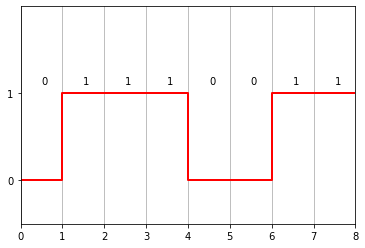

In [2]:
import digital_plot as dp
data = 's'
dp.plot_nrz_l(data)

### Codificación Manchester

Aunque simple, el código de línea NRZ unipolar tiene la desventaja de que la recepción de una cadena larga de ceros o de unos puede ser interpretada equívocamente cuando los relojes del transmisor y el receptor no están sincronizados correctamente.

En la siguiente gráfica se muestra que un receptor lee cuatro unos si utiliza el flanco de subida de la señal de reloj naranja, en cambio, si utiliza el flanco de subida de la señal azul, entonces lee cinco unos.

![Modelo de comunicación de datos](./Fig/clock_drift.svg)

Con el fin de evitar el problema de sincronización de los relojes, las redes de computadoras basadas en la tecnología Ethernet 10BASE-T emplean un código de línea llamado Manchester. Este código de línea utiliza 0 V para indicar la ausencia de datos. Además, emplea un nivel de voltaje positivo y uno negativo. Sin embargo, los niveles de voltaje no son los que se emplean para representar al cero y al uno lógico, sino las transiciones entre niveles. Exactamente, la transición hacia el nivel de voltaje positivo representa el uno, mientras que el cero se representa con una transición hacia el nivel de voltaje negativo. Así, el receptor no necesita sincronizarse con el transmisor porque las transiciones delimitan sin ambigüedad los unos y los ceros lógicos del mensaje.

En la figura de abajo se muestra la codificación Manchester del mensaje `1011001`. La señal en color negro corresponde al mensaje binario, la señal en color naranja a la señal de reloj y la señal en color azul corresponde al código Manchester. El nivel positivo de la señal Manchester se obtiene cuando el nivel lógico del mensaje es diferente del nivel lógico de la señal de reloj. Cuando el nivel lógico del mensaje es igual que el nivel lógico de la señal de reloj, entonces se obtiene un nivel negativo en la señal Manchester.

![Modelo de comunicación de datos](./Fig/manchester.svg)

La gráfica siguiente ilustra la señal Manchester que corresponde al código ASCII del caracter almacenado en la variable `data`. 

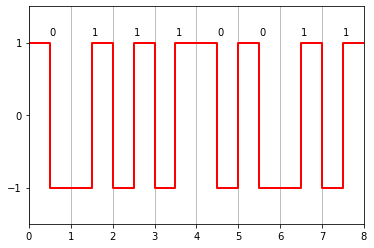

In [3]:
dp.plot_manchester_IEEE(data)

### 4d-PAM5

Todo código de línea tiene sus desventajas y el de la codificación Manchester es que requiere el doble de frecuencia que una señal NRZ-unipolar, por lo que se utiliza en enlaces con tasas de transmisión altas. Por ejemplo, la tecnología Gigabit Ethernet, que funciona 100 veces más rápido que la 10BASE-T, utiliza el código de línea 4d-PAM5 para enviar un gigabit por segundo. 

El código de línea 4d-PAM5 utiliza 5 niveles de voltaje: cuatro niveles codificados en código Gray que se utilizan para representar dos bits y el último se utiliza como bit redundante de los códigos de Trellis. El prefijo 4d de este código de línea se debe a que cada par de bits es enviado en paralelo por un alambre diferente.

Si omitimos el bit de redundancia del código PAM5, entonces tenemos código PAM4. Los códigos de línea PAM4 permiten enviar el doble de bits que los códigos NRZ, debido a que usan cuatro niveles en lugar de dos. En la tecnología Gigabit Ethernet, cada nivel tiene una duración de 8 ns. Esto significa que en un segundo la señal puede cambiar de nivel 125000000. El número de cambios de nivel por unidad de tiempo se conoce como *baudio*. Entonces, la señal PAM4 opera a una velocidad de 125 MBd. Para obtener la tasa de transferencia de PAM4 (o de cualquier otro código de línea) se utiliza la siguiente fórmula

$(baud \times \lfloor \log_{2}{levels} \rfloor)$.

Si sustituimos los 125 MBd en la variable *baud* y 5 en la variable *levels*, entonces obtenemos una tasa de transferencia de 250 Mbps por alambre. Dado que 4d-PAM5 utiliza 4 alambres, entonces este código de línea alcanza la asombrosa velocidad de 1 Gbps. En la siguiente figura tomada de www.rfwireless-world.com se muestra un ejemplo de codificación 4d-PAM5.

![Codificación 4d-PAM5](./Fig/4D-PAM5-line-coding.png)\

En la siguiente gráfica se muestra la codificación PAM4 de la variable data. Nota como el mensaje requiere la mitad de tiempo para ser representado en comparación con la codificación NRZ.


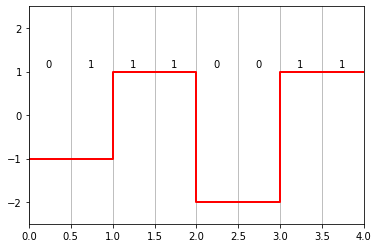

In [4]:
dp.plot_PAM4(data)

## Distorsión de las señales digitales

Los códigos de línea tienen la desventaja de que son susceptibles a errores por distorsión y atenuación. Los errores por distorsión ocurren porque los medios de transmisión actuan como filtros que solo dejan pasar ciertas frecuencias.

Los cables de pares trenzados de cobre tienen un ancho de banda de 4700 MHz. Esto significa que son distorsionadas las señales digitales con ancho de banda es mayor que 4700 MHz.

Para visualizar el concepto de ancho de banda, es común recurrir a las gráficas de espectro de frecuencia; éstas muestran el valor de la frecuencia en el eje de las abscisas y la potencia de la señal en el eje de las ordenadas.

El espectro de frecuencia de una señal digital se calcula mediante la transformada de Fourier. Esta transformada permite convertir una función dependiente del tiempo a un función dependiente de la frecuencia.

Una función modelo que se emplea para representar a las señales digitales es la función rectangular, ésta se define de la siguiente manera:

$ rect_T(t) = \left\{\begin{array}{ll}0 & |t| > T/2\\A/2 & |t| = A/2\\A & |t|<T/2\\ \end{array} \right. $

La transformada de Fourier de la función rectangular se calcula con la siguiente operación.

$\frac{1}{\sqrt{2\pi}}\int_{-\infty}^{\infty} rect(t)e^{-i2\pi ft} \,dt = \frac{AT\sin(\pi Tf)}{\pi Tf}$

En la gráfica de abajo se muestra el espectro de frecuencia de la función rectangular. Cada línea de color representa un diferente ancho de la función rectangular. La función amarilla corresponde a $T=0.5$, la azul a $T=1$, la verde a $T=2$ y la roja a $T=10$.

![Función sinc](./Fig/sinc.png)

El primer hecho que debe analizarse a partir del espectro de frecuencia de la función rectangular es que esta señal es digital y que requiere un ancho de banda infinito, dado que el dominio de las funciones ilustradas en la gráfica corresponde al intervalo $\[-\infty, \infty\]. Esto significa que ningún medio de transmisión es capaz de transmitir una señal digital sin distorsión.

Debido al hecho anterior, en las comunicaciones digitales solo se considera el lóbulo principal del espectro de frecuencia. Para el caso de la función azul, el lóbulo principal se encuentra en el intervalo de [-1, 1], esto significa que el lóbulo principal azul tiene un ancho de banda de 2 Hz.

Según el espectro de frecuencia, el lóbulo principal de la función con $T=0.5$ (color amarillo) es más ancho que el de la función con $T=10$ (color rojo). Esto implica que mientras menor sea el período de la señal digital (o mayor su frecuencia), más ancho será su lóbulo principal, por lo que requerira más ancho de banda para ser transmitida sin demasiada distorsión. Esta limitante es la causante de que la frecuencia de las señales digitales no pueda aumentarse arbitrariamente.



## Atenuación de las señales digitales

Los errores de atenuación se deben a que la potencia de la señal electromagnética decae mientras se propaga por el medio de transmisión. Las señales digitales de alta frecuencia tienden a atenuarse drásticamente con la distancia. Por ejemplo, los niveles de voltaje de una señal NRZ se vuelven ambiguos cuando el alambre que las transmite tiene una longitud de 2 m. En el caso de la tecnología Ethernet 10BaseT, se comienzan a presentar problemas de atenuación cuando el par trenzado tiene una longitud de 10 m. En el caso de la tecnología Gigabit Ethernet, la distancia máxima permitida es de 40 m.

Los errores de atenuación pueden mitigarse con un dispositivo de la capa física llamado repetidor (*hub*). Los repetidores regeneran las señales a sus niveles de voltaje correctos siempre que la atenuación no sea grave. En los circuitos digitales, se emplean compuertas búfer para regenerar las señales NRZ. En las redes de computadoras se utilizan amplificadores seguidores.

Aunque los repetidores son útiles para regenerar las señales digitales, en la práctica solo se puede usar un número limitado de estos para extender el alcance de un enlace. En el caso de la tecnología Ethernet 10BaseT, solo se pueden utilizar tres repetidores para alcanzar un máximo teórico de 300 m.

## Modulación digital

En las redes de computadoras, existen enlaces de larga distancia, como el que conecta una red casera con la red del ISP. Sobre estos enlaces no se envían señales digitales, sino señales analógicas que portan mensajes binarios.

La modulación digital emplea una señal senoidal llamada portadora a la que se le modifica alguna de sus propiedades: amplitud, frecuencia o fase; dependiendo de valor de los bits del mensaje.

La gran ventaja de la modulación digital es que la señal portadora tiene un ancho de banda acotado. Por ejemplo, si se calcula la transformada de Fourier de la señal $\sin(\omega t)$ se obtiene el siguiente espectro de frecuencia, donde $\omega$ es la frecuencia angular y $\delta(x)$ es el impulso unitario, también conocido como *delta de Dirac*. Como puede observarse, la función $\sin(\omega t)$ tiene un ancho de banda de $2\omega_0$.

![Espectro de la función seno](./Fig/sin_spectrum.svg)


### ASK

ASK (*amplitude shift keying*) es una técnica de modulación digital en la que la amplitud de la señal portadora está en función del valor de los bits del mensajes. Por ejemplo, es posible asignar una amplitud de 0.5 al bit cero y una de 2 al bit uno.

En la siguiente figura se muestra la señal portadora modulada en amplitud por los bits del mensaje de la variable data.

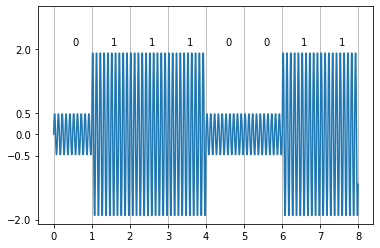

In [5]:
dp.plot_ask(data, 20)

## FSK

FSK (*frequency shift keying*) es una técnica de modulación digital en la que la señal portadora aumenta o disminuye su frecuencia según el valor de los bits del mensaje portado. Por ejemplo, el uno lógico puede aumentar cinco veces la frecuencia de la portadora, mientras que el cero lógico simplemente puede preservarla.

En la figura de abajo se muestra una señal portadora modulada en frecuencia por los bits del mensaje de la variable `data`.

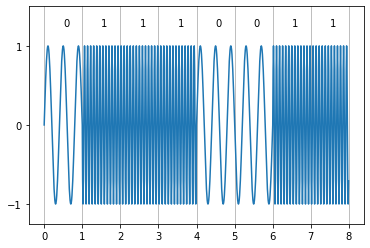

In [6]:
dp.plot_fsk(data, 5)